In [1]:
%pwd

'/Users/ryandevera/data-science/tesorio/NCVX-Neural-Structural-Optimization/notebooks'

In [2]:
%cd ..

/Users/ryandevera/data-science/tesorio/NCVX-Neural-Structural-Optimization


In [3]:
%ls

README.md                jobs/                    tasks.py
Untitled.ipynb           models.py                tests/
__init__.py              multi_material_train.py  tf.py
__pycache__/             notebooks/               topo_api.py
buyun_test/              problems.py              topo_physics.py
experiments.py           pygranso_demo.py         train.py
frames/                  raw_data/                utils/
ideas.py                 results/                 utils.py
images/                  structural_opt.png


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib import colors

import multi_material_train
import problems
import topo_physics

# Multi-Material with MLP

Running on CPU


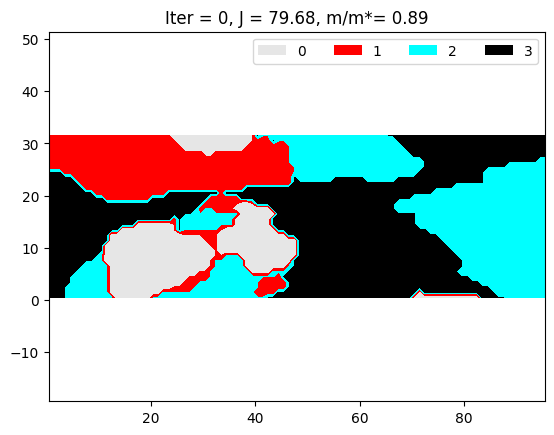

0 p 1.010 J0 1.960;  loss 1.966; massCons -0.106; relGray 0.840


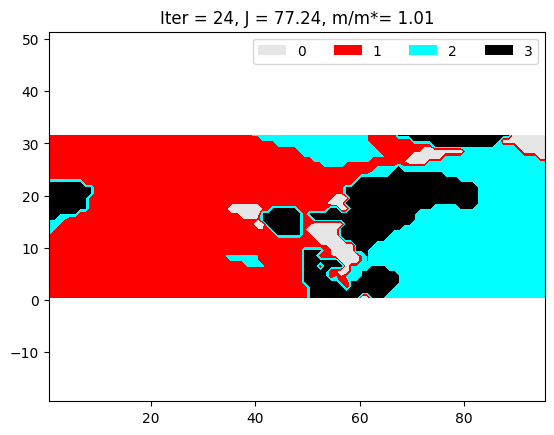

24 p 1.250 J0 1.900;  loss 1.901; massCons 0.015; relGray 0.788


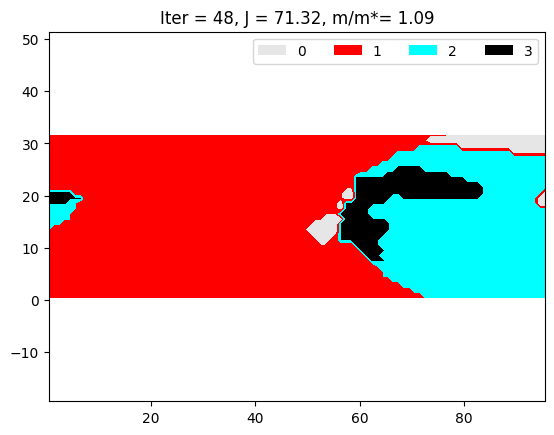

48 p 1.490 J0 1.755;  loss 1.818; massCons 0.090; relGray 0.653


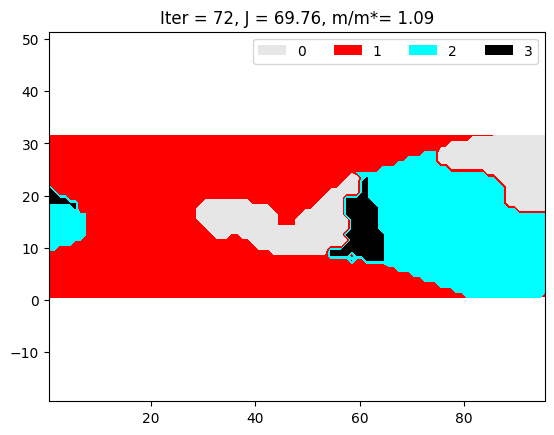

72 p 1.730 J0 1.716;  loss 1.816; massCons 0.094; relGray 0.581


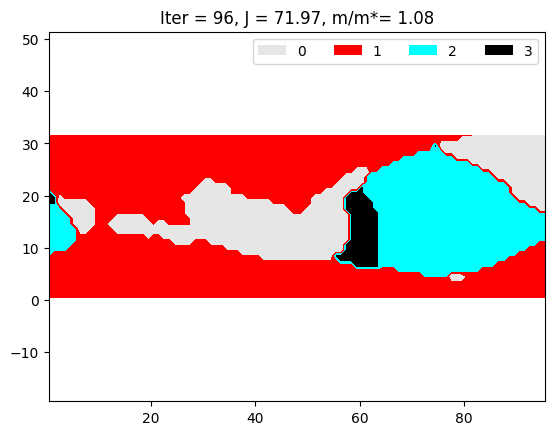

96 p 1.970 J0 1.771;  loss 1.868; massCons 0.081; relGray 0.479


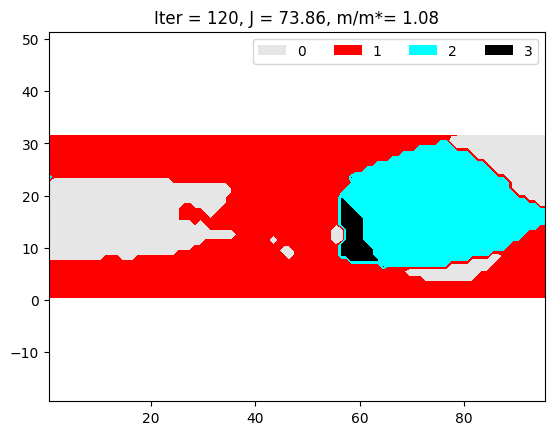

120 p 2.210 J0 1.817;  loss 1.926; massCons 0.077; relGray 0.364


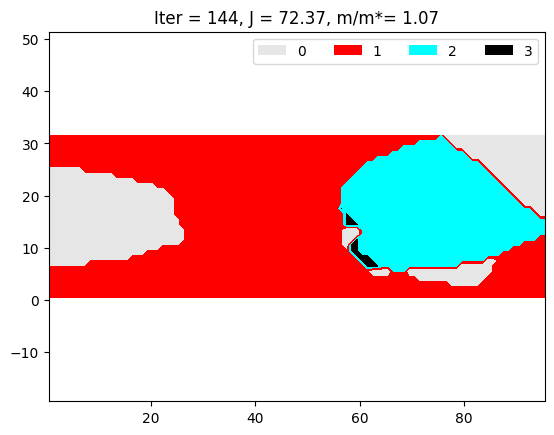

144 p 2.450 J0 1.780;  loss 1.889; massCons 0.070; relGray 0.279


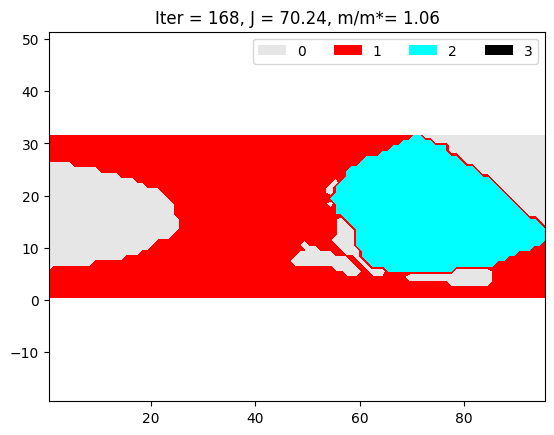

168 p 2.690 J0 1.728;  loss 1.813; massCons 0.058; relGray 0.219


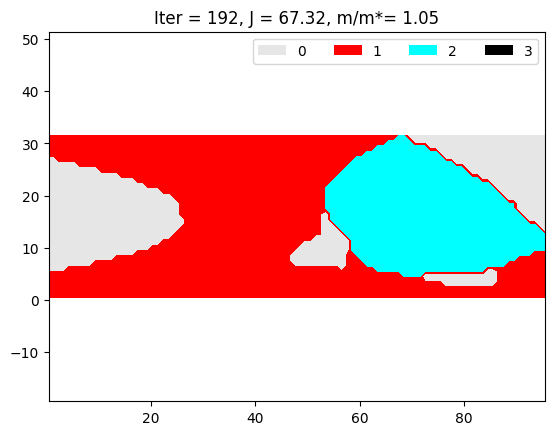

192 p 2.930 J0 1.656;  loss 1.719; massCons 0.046; relGray 0.177


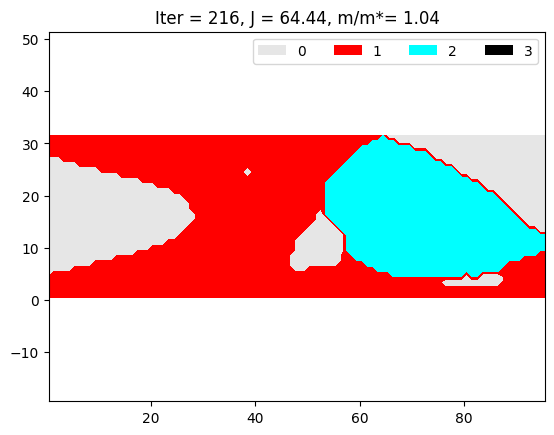

216 p 3.170 J0 1.585;  loss 1.635; massCons 0.039; relGray 0.123


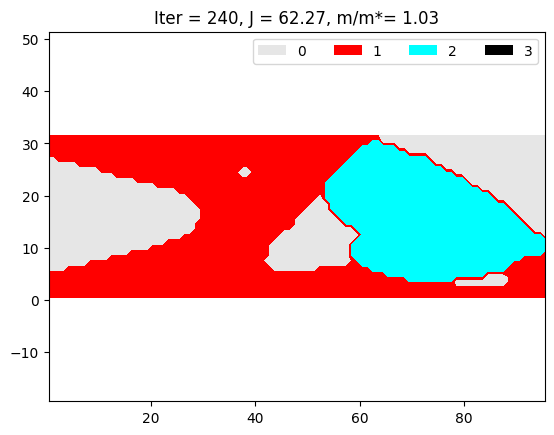

240 p 3.410 J0 1.532;  loss 1.566; massCons 0.030; relGray 0.087


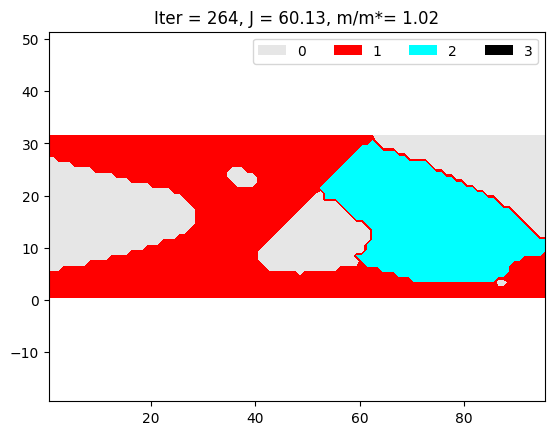

264 p 3.650 J0 1.479;  loss 1.503; massCons 0.024; relGray 0.050


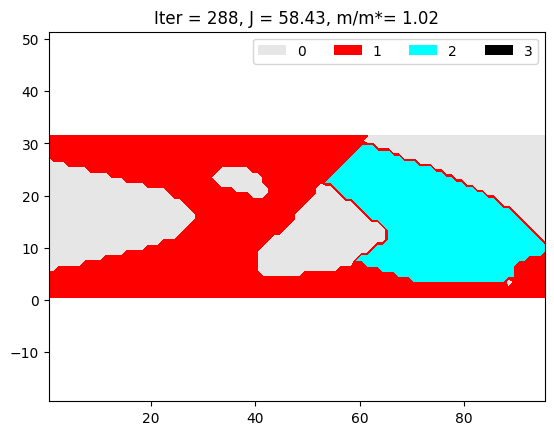

288 p 3.890 J0 1.437;  loss 1.452; massCons 0.018; relGray 0.035
288 p 3.890 J0 1.437;  loss 1.452; massCons 0.018; relGray 0.035
Time taken: 25.18


<Figure size 640x480 with 0 Axes>

In [5]:
model_type = 'mlp'
multi_material_train.runExample(model_type=model_type)

# Multi-Material with CNN

Running on CPU


/Users/ryandevera/data-science/tesorio/NCVX-Neural-Structural-Optimization/models.py:687: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = softmax(output) + 1e-4


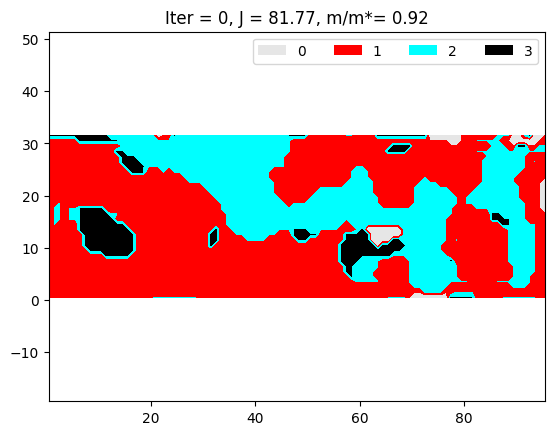

0 p 1.010 J0 2.012;  loss 2.015; massCons -0.076; relGray 0.484


/Users/ryandevera/data-science/tesorio/NCVX-Neural-Structural-Optimization/models.py:687: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = softmax(output) + 1e-4


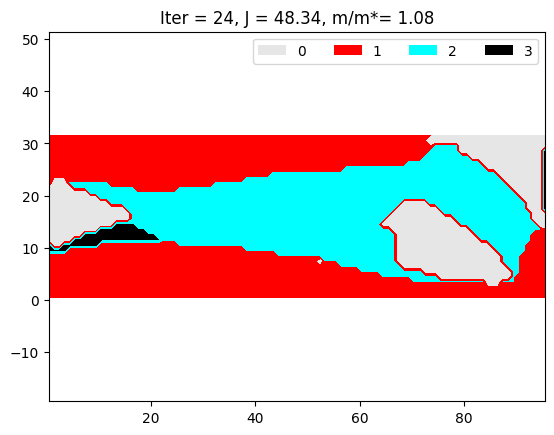

24 p 1.250 J0 1.189;  loss 1.216; massCons 0.080; relGray 0.192


/Users/ryandevera/data-science/tesorio/NCVX-Neural-Structural-Optimization/models.py:687: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = softmax(output) + 1e-4


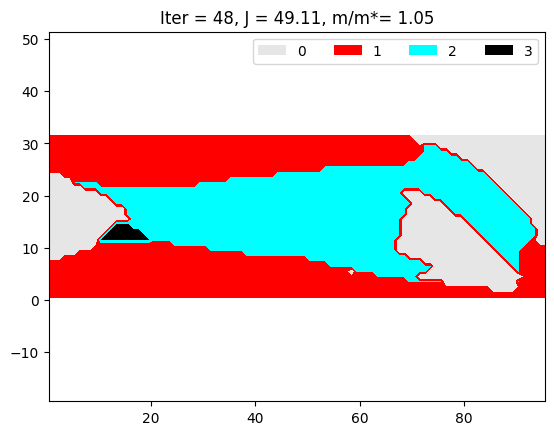

48 p 1.490 J0 1.208;  loss 1.227; massCons 0.049; relGray 0.129


/Users/ryandevera/data-science/tesorio/NCVX-Neural-Structural-Optimization/models.py:687: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = softmax(output) + 1e-4


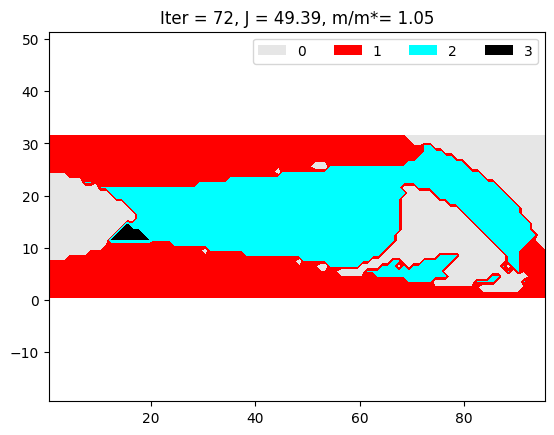

72 p 1.730 J0 1.215;  loss 1.242; massCons 0.048; relGray 0.113


/Users/ryandevera/data-science/tesorio/NCVX-Neural-Structural-Optimization/models.py:687: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = softmax(output) + 1e-4


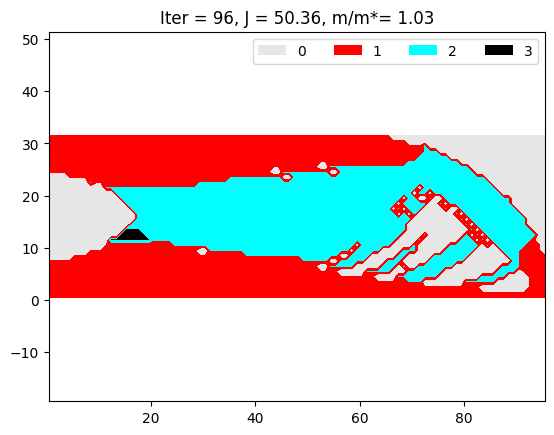

96 p 1.970 J0 1.239;  loss 1.253; massCons 0.031; relGray 0.095


/Users/ryandevera/data-science/tesorio/NCVX-Neural-Structural-Optimization/models.py:687: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = softmax(output) + 1e-4


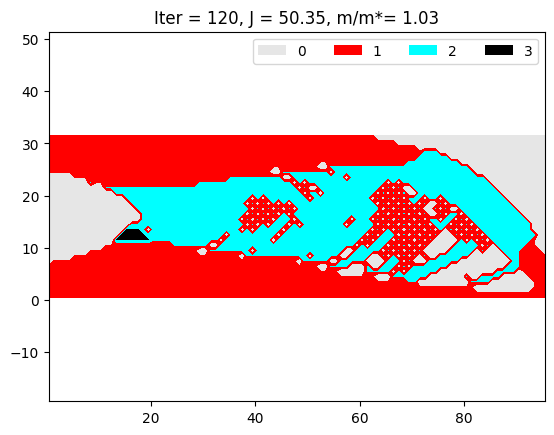

120 p 2.210 J0 1.239;  loss 1.250; massCons 0.025; relGray 0.055


/Users/ryandevera/data-science/tesorio/NCVX-Neural-Structural-Optimization/models.py:687: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = softmax(output) + 1e-4


127 p 2.280 J0 1.223;  loss 1.240; massCons 0.029; relGray 0.031
Time taken: 12.17


<Figure size 640x480 with 0 Axes>

In [6]:
model_type = 'cnn'
multi_material_train.runExample(model_type=model_type)